In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime


In [3]:
df = pd.read_csv("../raw_data/SM_ELEC_METER_HST_202309251814.csv", usecols=[0, 1, 3, 5])
df

,HOUSE_ID_DONG,HOUSE_ID_HO_PRE,METER_DATE,ELEC_INST_EFF
0,561,10,2022-07-18 00:00:25,190
1,561,10,2022-07-18 00:10:25,191
2,561,10,2022-07-18 00:20:25,153
3,561,10,2022-07-18 00:30:19,231
4,561,10,2022-07-18 00:40:28,169
...,...,...,...,...
19969705,563,23,2023-08-30 10:30:08,319
19969706,563,23,2023-08-30 10:40:08,192
19969707,563,23,2023-08-30 10:40:08,185
19969708,563,23,2023-08-30 10:40:08,308


In [4]:
df.columns = ["BUILDING", "FLOOR", "TIMESTAMP", "CONSUMPTION(W)"]
df

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,10,2022-07-18 00:00:25,190
1,561,10,2022-07-18 00:10:25,191
2,561,10,2022-07-18 00:20:25,153
3,561,10,2022-07-18 00:30:19,231
4,561,10,2022-07-18 00:40:28,169
...,...,...,...,...
19969705,563,23,2023-08-30 10:30:08,319
19969706,563,23,2023-08-30 10:40:08,192
19969707,563,23,2023-08-30 10:40:08,185
19969708,563,23,2023-08-30 10:40:08,308


In [6]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19969710 entries, 0 to 19969709
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   BUILDING        int64         
 1   FLOOR           int64         
 2   TIMESTAMP       datetime64[ns]
 3   CONSUMPTION(W)  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 609.4 MB


In [7]:
df.isna().sum()

BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dtype: int64

In [8]:
for i, row in df.iterrows():
    df.at[i,'TIMESTAMP'] = row['TIMESTAMP'].replace(second = 0)
    
df

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,10,2022-07-18 00:00:00,190
1,561,10,2022-07-18 00:10:00,191
2,561,10,2022-07-18 00:20:00,153
3,561,10,2022-07-18 00:30:00,231
4,561,10,2022-07-18 00:40:00,169
...,...,...,...,...
19969705,563,23,2023-08-30 10:30:00,319
19969706,563,23,2023-08-30 10:40:00,192
19969707,563,23,2023-08-30 10:40:00,185
19969708,563,23,2023-08-30 10:40:00,308


In [38]:
floors_561 = df.query("`BUILDING` == 561")['FLOOR'].drop_duplicates().sort_values()
floors_561

1205603     1
401852      2
114814      3
2066740     4
1550095     5
574092      6
516681      7
172208      8
688893      9
0          10
803716     11
57403      12
459272     13
1664918    14
861129     15
229613     16
287025     17
344439     18
Name: FLOOR, dtype: int64

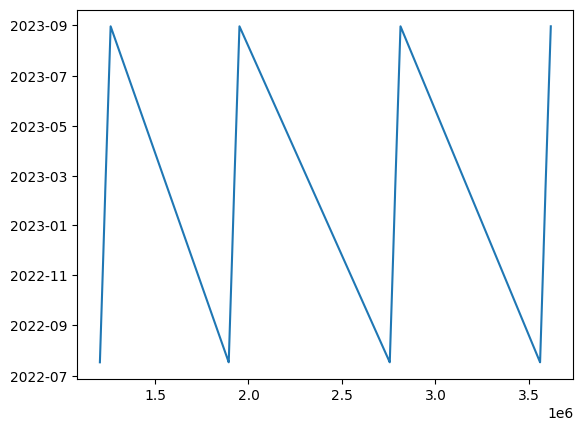

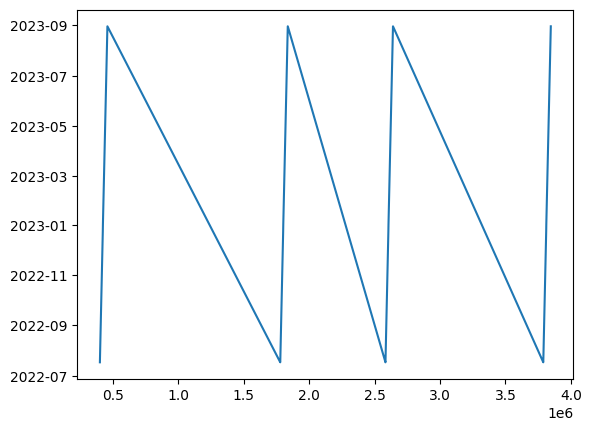

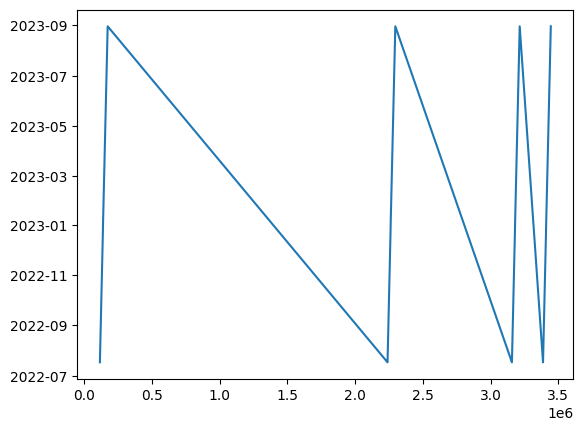

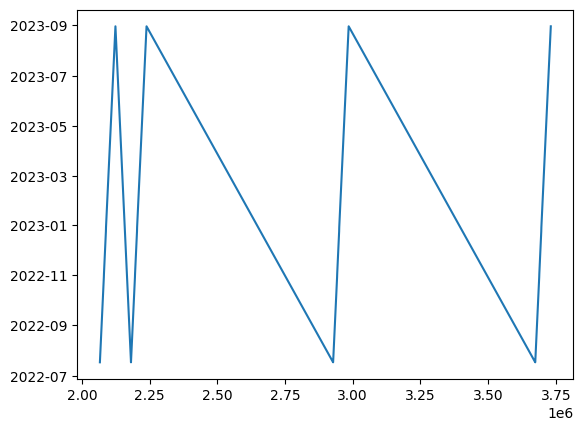

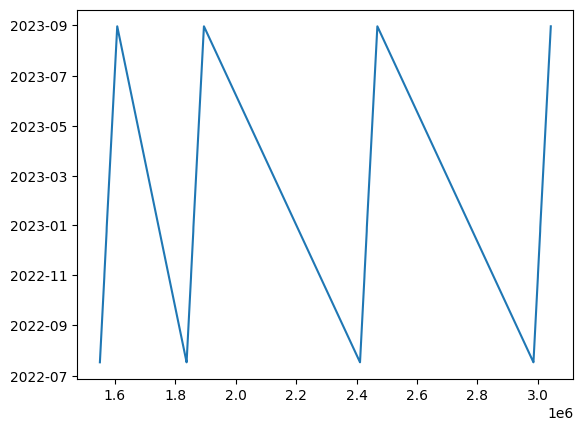

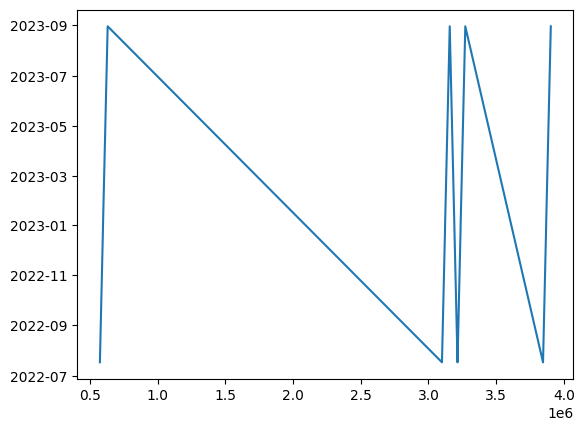

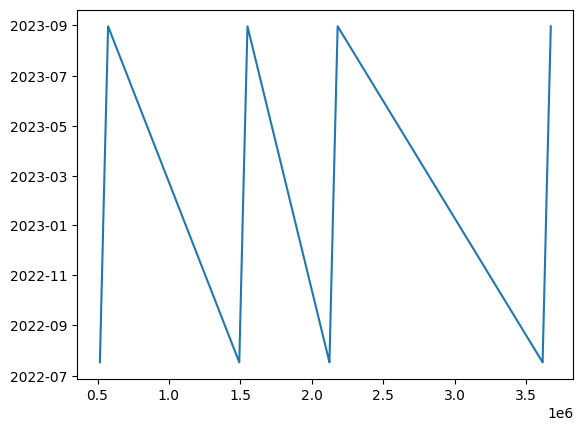

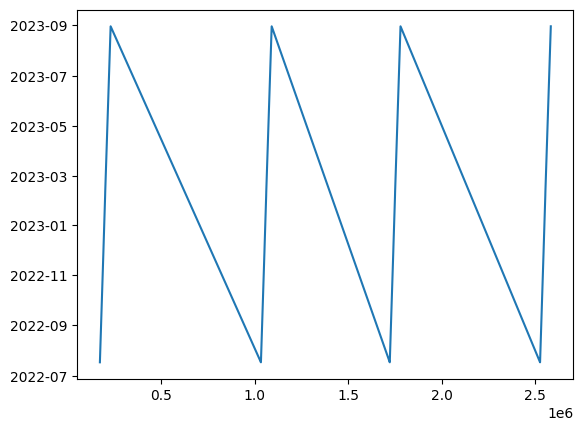

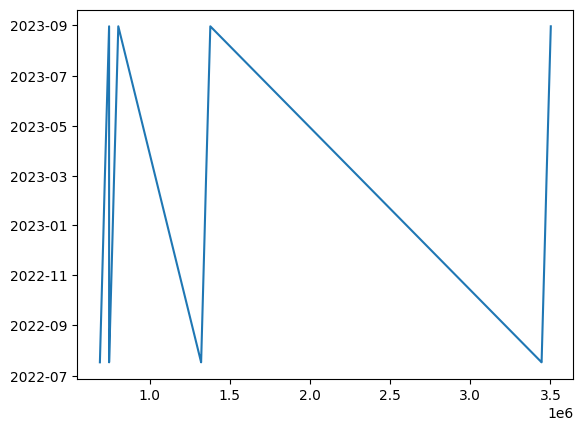

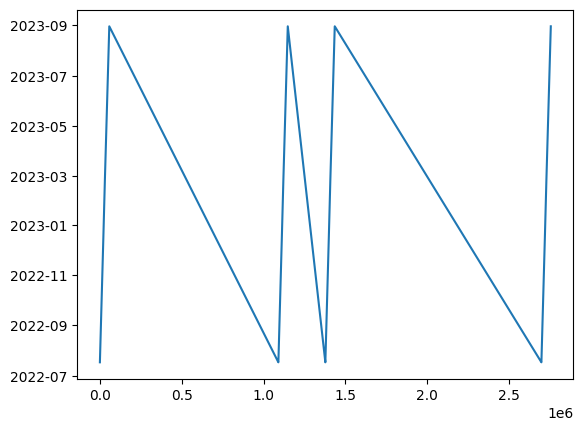

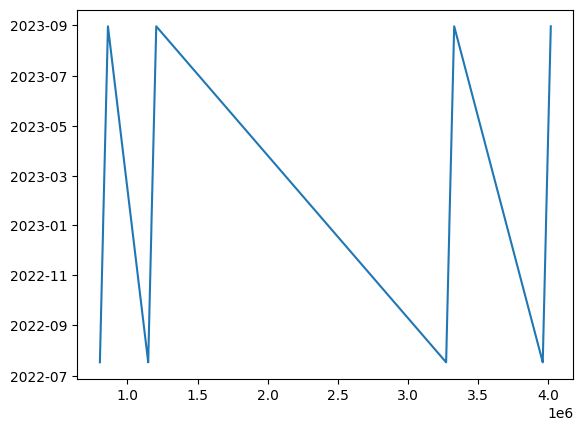

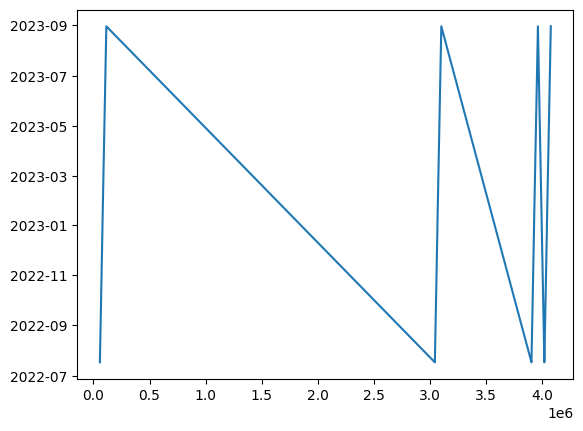

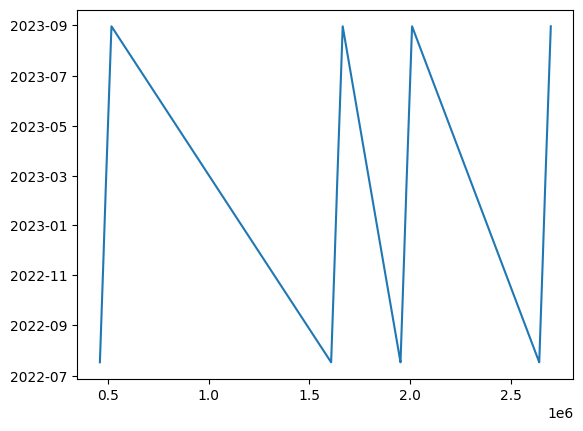

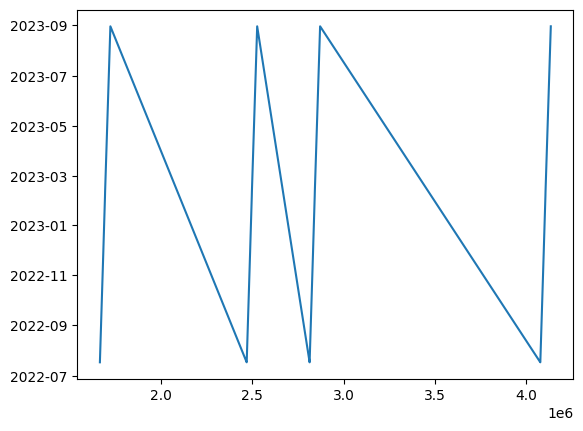

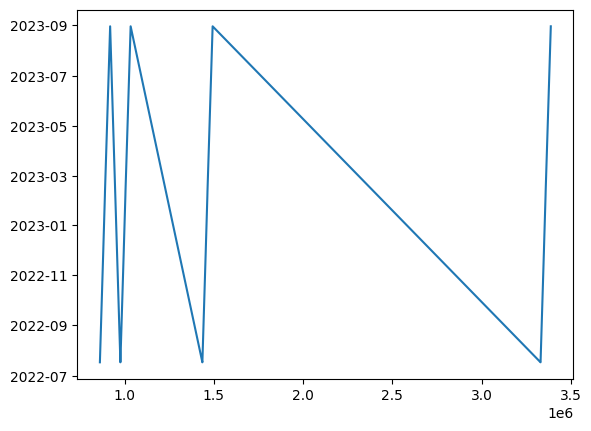

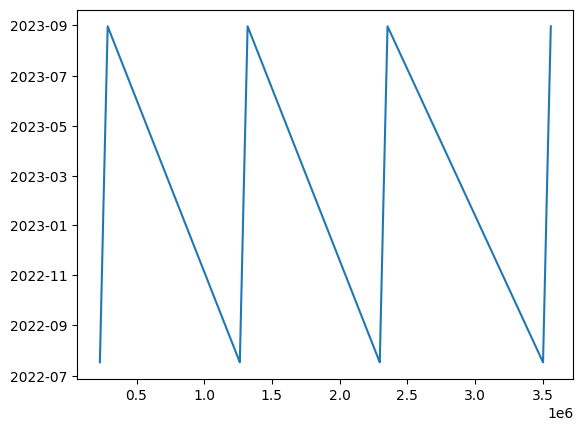

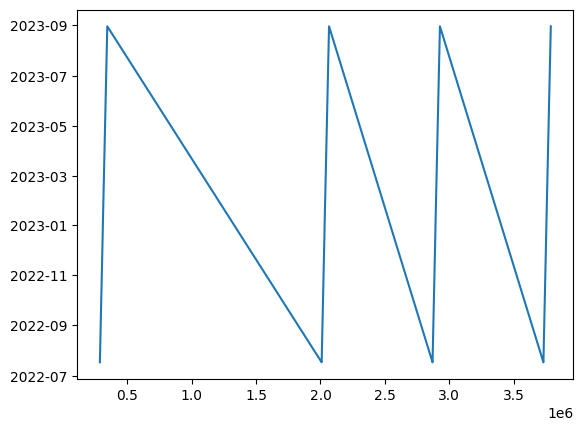

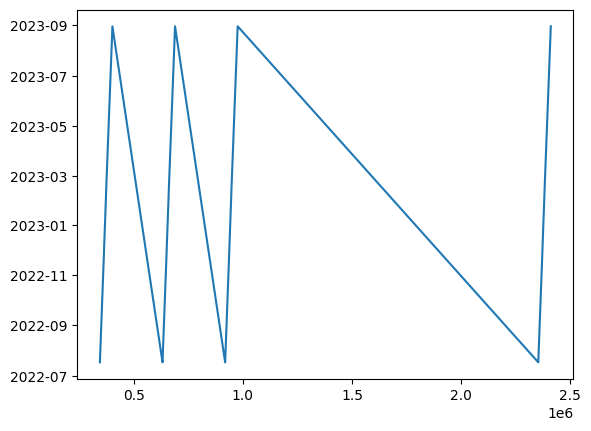

In [44]:
for f in floors_561:
    plt.plot(df.query(f"`BUILDING` == 561 & `FLOOR` == {f}")['TIMESTAMP'])
    plt.show()

<Axes: >

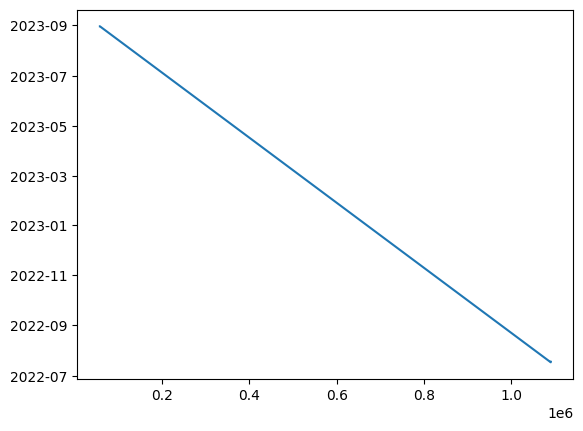

In [10]:
df.query("`BUILDING` == 561 & `FLOOR` == 10")[57400:57500]['TIMESTAMP'].plot()

<Axes: >

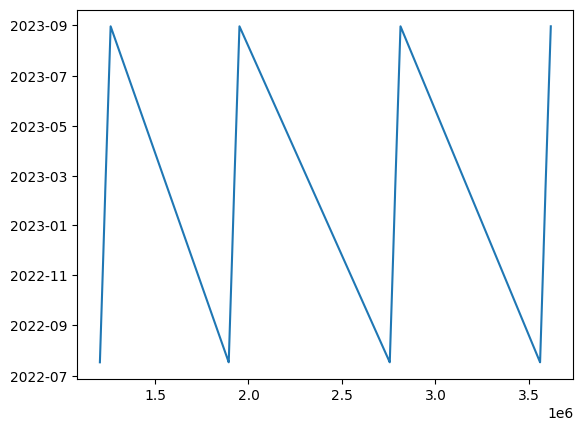

In [46]:
df_561_1 = df.query("`BUILDING` == 561 & `FLOOR` == 1")
df_561_1['TIMESTAMP'].plot()

In [65]:
df_561_1.reset_index(drop=True, inplace=True)

In [56]:
start_time = df_561_1['TIMESTAMP'].min()

In [58]:
end_time = df_561_1['TIMESTAMP'].max()

In [66]:
df_561_1.query('`TIMESTAMP` == @start_time')

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,1,2022-07-18,948
57413,561,1,2022-07-18,1239
114824,561,1,2022-07-18,181
172246,561,1,2022-07-18,1733


In [67]:
df_561_1.query('`TIMESTAMP` == @end_time')

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
57409,561,1,2023-08-30 10:40:00,490
57410,561,1,2023-08-30 10:40:00,512
57411,561,1,2023-08-30 10:40:00,433
57412,561,1,2023-08-30 10:40:00,471
114820,561,1,2023-08-30 10:40:00,950
114821,561,1,2023-08-30 10:40:00,979
114822,561,1,2023-08-30 10:40:00,1266
114823,561,1,2023-08-30 10:40:00,916
172242,561,1,2023-08-30 10:40:00,467
172243,561,1,2023-08-30 10:40:00,446


<Axes: >

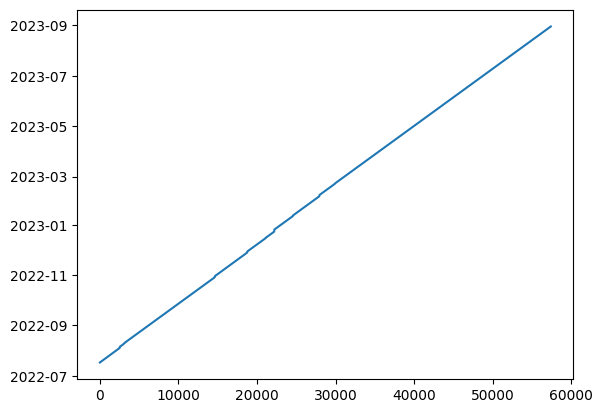

In [79]:
df_561_1.iloc[0:57409]['TIMESTAMP'].plot()

<Axes: >

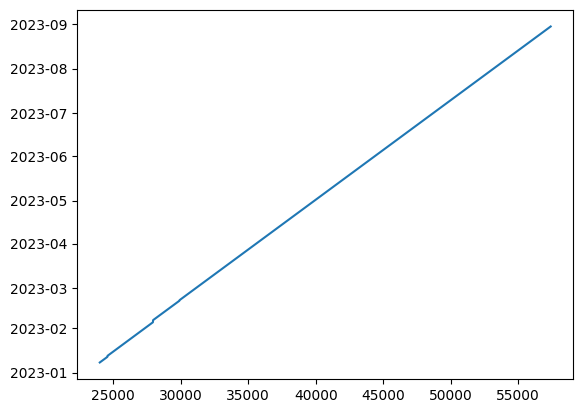

In [83]:
df_561_1.iloc[24000:57409]['TIMESTAMP'].plot()

<Axes: >

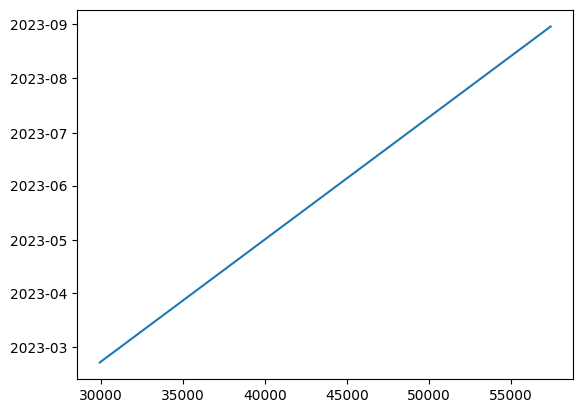

In [90]:
df_561_1.iloc[29910:57409]['TIMESTAMP'].plot()

In [93]:
df_561_1.iloc[29910:57409]['CONSUMPTION(W)'].resample().plot()

TypeError: resample() missing 1 required positional argument: 'rule'

In [135]:
test = df_561_1.iloc[29910:57409]
test.set_index(keys = 'TIMESTAMP', inplace=True)
test

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-02-20 11:30:00,561,1,75
2023-02-20 11:40:00,561,1,234
2023-02-20 11:50:00,561,1,182
2023-02-20 12:00:00,561,1,67
2023-02-20 12:10:00,561,1,43
...,...,...,...
2023-08-30 09:50:00,561,1,354
2023-08-30 10:00:00,561,1,354
2023-08-30 10:10:00,561,1,387


In [102]:
test.resample(rule = '30MIN')['CONSUMPTION(W)'].max()

TIMESTAMP
2023-02-20 11:30:00    234
2023-02-20 12:00:00    286
2023-02-20 12:30:00    386
2023-02-20 13:00:00    321
2023-02-20 13:30:00    176
                      ... 
2023-08-30 08:30:00    448
2023-08-30 09:00:00    404
2023-08-30 09:30:00    354
2023-08-30 10:00:00    505
2023-08-30 10:30:00    547
Freq: 30T, Name: CONSUMPTION(W), Length: 9167, dtype: int64

<Axes: xlabel='TIMESTAMP'>

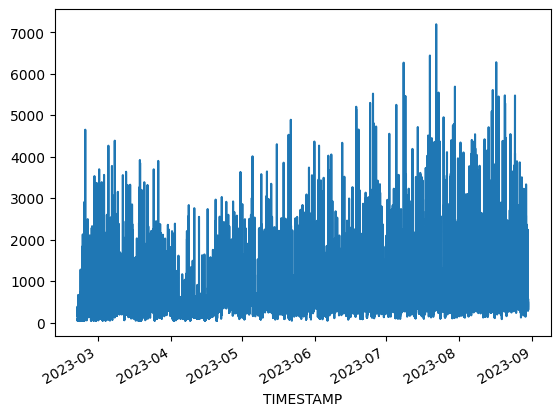

In [105]:
test['CONSUMPTION(W)'].plot()

<Axes: xlabel='TIMESTAMP'>

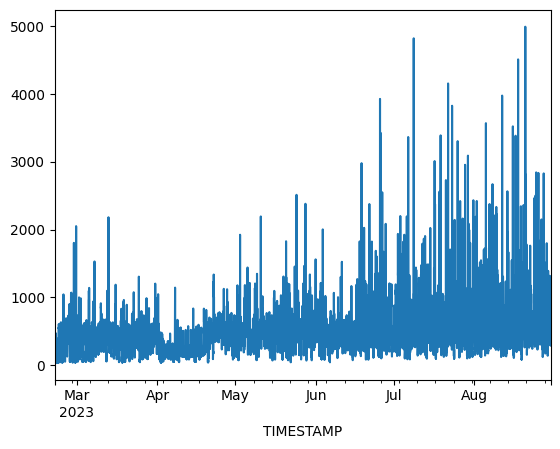

In [104]:
test.resample(rule = '30MIN')['CONSUMPTION(W)'].min().plot()

<Axes: xlabel='TIMESTAMP'>

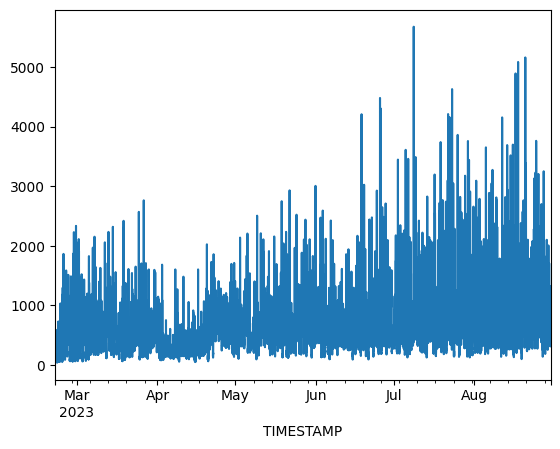

In [103]:
test.resample(rule = '30MIN')['CONSUMPTION(W)'].mean().plot()

In [138]:
test

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-02-20 11:30:00,561,1,75
2023-02-20 11:40:00,561,1,234
2023-02-20 11:50:00,561,1,182
2023-02-20 12:00:00,561,1,67
2023-02-20 12:10:00,561,1,43
...,...,...,...
2023-08-30 09:50:00,561,1,354
2023-08-30 10:00:00,561,1,354
2023-08-30 10:10:00,561,1,387


In [146]:
datetime.datetime.today().minute

17

In [150]:
datetime.datetime.today().replace(minute = datetime.datetime.today().minute//10 * 10)

datetime.datetime(2023, 10, 27, 16, 10, 25, 169019)

In [165]:
start_time = test.iloc[0].name
start_time

Timestamp('2023-02-20 11:30:00')

In [170]:
test.loc[start_time]

BUILDING          561
FLOOR               1
CONSUMPTION(W)     75
Name: 2023-02-20 11:30:00, dtype: int64

In [172]:
test.loc[start_time].name.replace(second = 11)
test.loc[start_time]

BUILDING          561
FLOOR               1
CONSUMPTION(W)     75
Name: 2023-02-20 11:30:00, dtype: int64

In [173]:
test = df_561_1.iloc[29910:57409]
test.reset_index(drop=True, inplace=True)
test

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,1,2023-02-20 11:30:00,75
1,561,1,2023-02-20 11:40:00,234
2,561,1,2023-02-20 11:50:00,182
3,561,1,2023-02-20 12:00:00,67
4,561,1,2023-02-20 12:10:00,43
...,...,...,...,...
27494,561,1,2023-08-30 09:50:00,354
27495,561,1,2023-08-30 10:00:00,354
27496,561,1,2023-08-30 10:10:00,387
27497,561,1,2023-08-30 10:20:00,505


In [182]:
test.at[0,'TIMESTAMP']

Timestamp('2023-02-20 11:30:00')

In [186]:
test.iloc[0]['TIMESTAMP'] = test.iloc[0]['TIMESTAMP'].replace(second = 22)
test.iloc[0]

C:\Users\hansung\AppData\Local\Temp\ipykernel_35644\532942310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.iloc[0]['TIMESTAMP'] = test.iloc[0]['TIMESTAMP'].replace(second = 22)


BUILDING                          561
FLOOR                               1
TIMESTAMP         2023-02-20 11:30:11
CONSUMPTION(W)                     75
Name: 0, dtype: object

In [188]:
for i, row in test.iterrows():
    test.at[i,'TIMESTAMP'] = row['TIMESTAMP'].replace(second = 0, minute = row['TIMESTAMP'].minute//10 * 10)
    
test

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
0,561,1,2023-02-20 11:30:00,75
1,561,1,2023-02-20 11:40:00,234
2,561,1,2023-02-20 11:50:00,182
3,561,1,2023-02-20 12:00:00,67
4,561,1,2023-02-20 12:10:00,43
...,...,...,...,...
27494,561,1,2023-08-30 09:50:00,354
27495,561,1,2023-08-30 10:00:00,354
27496,561,1,2023-08-30 10:10:00,387
27497,561,1,2023-08-30 10:20:00,505


In [156]:
test

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-02-20 11:30:00,561,1,75
2023-02-20 11:40:00,561,1,234
2023-02-20 11:50:00,561,1,182
2023-02-20 12:00:00,561,1,67
2023-02-20 12:10:00,561,1,43
...,...,...,...
2023-08-30 09:50:00,561,1,354
2023-08-30 10:00:00,561,1,354
2023-08-30 10:10:00,561,1,387


In [160]:
for i, row in test.iterrows():
    if i > test.iloc[0].name + datetime.timedelta(hours=1): break

    print(row.name.)

2023-02-20 11:30:00
2023-02-20 11:40:00
2023-02-20 11:50:00
2023-02-20 12:00:00
2023-02-20 12:10:00
2023-02-20 12:20:00
2023-02-20 12:30:00


In [190]:
test.set_index(keys='TIMESTAMP', inplace=True)


In [191]:
test

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-02-20 11:30:00,561,1,75
2023-02-20 11:40:00,561,1,234
2023-02-20 11:50:00,561,1,182
2023-02-20 12:00:00,561,1,67
2023-02-20 12:10:00,561,1,43
...,...,...,...
2023-08-30 09:50:00,561,1,354
2023-08-30 10:00:00,561,1,354
2023-08-30 10:10:00,561,1,387


In [197]:
begin_idx = test.iloc[0].name
last_idx = test.iloc[-1].name

#결측치 찾기
missing_times = []
time = begin_idx
i = 0
while time <= last_idx:
    if test.iloc[i].name != time:
        i -= 1
        missing_times.append(time)

    i += 1
    time += datetime.timedelta(minutes = 10)

print('결측치 갯수:', len(missing_times))

결측치 갯수: 0


In [204]:
test.loc['2023-03-16 06:00:00' : ]

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 06:30:00,561,1,225
2023-03-16 06:40:00,561,1,217
2023-03-16 06:50:00,561,1,212
2023-03-16 07:00:00,561,1,88
2023-03-16 07:10:00,561,1,435
...,...,...,...
2023-08-30 09:50:00,561,1,354
2023-08-30 10:00:00,561,1,354
2023-08-30 10:10:00,561,1,387


In [198]:
START_TIME = '2023-03-16 06:30:00'

In [206]:
END_TIME = test.iloc[-1].name

In [283]:
df_561_2 = df.query('`BUILDING` == 561 and `FLOOR` == 2')
df_561_2

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
401852,561,2,2022-07-18 00:00:00,1152
401853,561,2,2022-07-18 00:10:00,842
401854,561,2,2022-07-18 00:20:00,835
401855,561,2,2022-07-18 00:30:00,859
401856,561,2,2022-07-18 00:40:00,870
...,...,...,...,...
3846419,561,2,2023-08-30 10:30:00,235
3846420,561,2,2023-08-30 10:40:00,193
3846421,561,2,2023-08-30 10:40:00,192
3846422,561,2,2023-08-30 10:40:00,399


In [284]:
df_561_2.query("`TIMESTAMP` == @START_TIME")

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
435195,561,2,2023-03-16 06:30:00,256
1813029,561,2,2023-03-16 06:30:00,730
2616745,561,2,2023-03-16 06:30:00,62
3822347,561,2,2023-03-16 06:30:00,239


In [285]:
df_561_2.query("`TIMESTAMP` == @END_TIME")

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
459267,561,2,2023-08-30 10:30:00,865
1837100,561,2,2023-08-30 10:30:00,53
2640817,561,2,2023-08-30 10:30:00,351
3846419,561,2,2023-08-30 10:30:00,235


In [286]:
test2 = df_561_2.loc[435195:459267].set_index(keys='TIMESTAMP')
test2


,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 06:30:00,561,2,256
2023-03-16 06:40:00,561,2,252
2023-03-16 06:50:00,561,2,237
2023-03-16 07:00:00,561,2,307
2023-03-16 07:10:00,561,2,304
...,...,...,...
2023-08-30 09:50:00,561,2,1244
2023-08-30 10:00:00,561,2,1309
2023-08-30 10:10:00,561,2,1233


In [291]:
test2.loc['2023-03-16 09:00:00':'2023-03-16 09:40:00']

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 09:00:00,561,2,356
2023-03-16 09:10:00,561,2,488
2023-03-16 09:20:00,561,2,464
2023-03-16 09:30:00,561,2,791
2023-03-16 09:40:00,561,2,596


In [288]:
test2.loc[test2.duplicated()]

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 09:20:00,561,2,464
2023-03-16 16:20:00,561,2,361
2023-03-16 17:20:00,561,2,343
2023-03-16 18:40:00,561,2,1159
2023-03-16 23:10:00,561,2,2114
...,...,...,...
2023-08-30 09:50:00,561,2,1244
2023-08-30 10:00:00,561,2,1309
2023-08-30 10:10:00,561,2,1233


In [280]:
test2

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 06:30:00,561,2,256
2023-03-16 06:40:00,561,2,252
2023-03-16 06:50:00,561,2,237
2023-03-16 07:00:00,561,2,307
2023-03-16 07:10:00,561,2,304
...,...,...,...
2023-08-30 09:50:00,561,2,1244
2023-08-30 10:00:00,561,2,1309
2023-08-30 10:10:00,561,2,1233


In [281]:
sum(test2.duplicated())

21480

In [264]:
test3 = test2.sort_index()
test3

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 06:30:00,561,2,256
2023-03-16 06:40:00,561,2,252
2023-03-16 06:50:00,561,2,237
2023-03-16 07:00:00,561,2,307
2023-03-16 07:10:00,561,2,304
...,...,...,...
2023-08-30 09:50:00,561,2,1244
2023-08-30 10:00:00,561,2,1309
2023-08-30 10:10:00,561,2,1233


In [268]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24073 entries, 2023-03-16 06:30:00 to 2023-08-30 10:30:00
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   BUILDING        24073 non-null  int64
 1   FLOOR           24073 non-null  int64
 2   CONSUMPTION(W)  24073 non-null  int64
dtypes: int64(3)
memory usage: 1.2 MB


In [269]:
test3.loc['2023-03-16 06:30:00']

BUILDING          561
FLOOR               2
CONSUMPTION(W)    256
Name: 2023-03-16 06:30:00, dtype: int64

In [265]:
test2.loc[test3.duplicated(keep=False)]

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 06:30:00,561,2,256
2023-03-16 06:40:00,561,2,252
2023-03-16 06:50:00,561,2,237
2023-03-16 07:00:00,561,2,307
2023-03-16 07:10:00,561,2,304
...,...,...,...
2023-08-30 09:50:00,561,2,1244
2023-08-30 10:00:00,561,2,1309
2023-08-30 10:10:00,561,2,1233


In [252]:
test2.index.to_list()

[Timestamp('2023-03-16 06:30:00'),
 Timestamp('2023-03-16 06:40:00'),
 Timestamp('2023-03-16 06:50:00'),
 Timestamp('2023-03-16 07:00:00'),
 Timestamp('2023-03-16 07:10:00'),
 Timestamp('2023-03-16 07:20:00'),
 Timestamp('2023-03-16 07:30:00'),
 Timestamp('2023-03-16 07:40:00'),
 Timestamp('2023-03-16 07:50:00'),
 Timestamp('2023-03-16 08:00:00'),
 Timestamp('2023-03-16 08:10:00'),
 Timestamp('2023-03-16 08:20:00'),
 Timestamp('2023-03-16 08:30:00'),
 Timestamp('2023-03-16 08:40:00'),
 Timestamp('2023-03-16 08:50:00'),
 Timestamp('2023-03-16 09:00:00'),
 Timestamp('2023-03-16 09:10:00'),
 Timestamp('2023-03-16 09:20:00'),
 Timestamp('2023-03-16 09:30:00'),
 Timestamp('2023-03-16 09:40:00'),
 Timestamp('2023-03-16 09:50:00'),
 Timestamp('2023-03-16 10:00:00'),
 Timestamp('2023-03-16 10:10:00'),
 Timestamp('2023-03-16 10:20:00'),
 Timestamp('2023-03-16 10:30:00'),
 Timestamp('2023-03-16 10:40:00'),
 Timestamp('2023-03-16 10:50:00'),
 Timestamp('2023-03-16 11:00:00'),
 Timestamp('2023-03-

<Axes: >

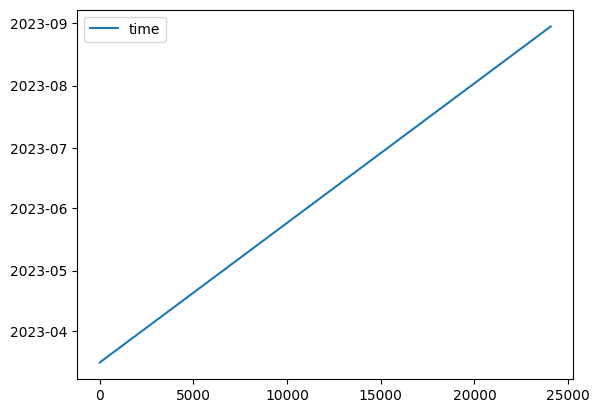

In [251]:
pd.DataFrame({'time':test2.index.to_list()}).plot()

In [ ]:
test2.loc['2023-03-16 09:20:00' :]

In [195]:
test = test.loc['2023-03-16 06:30:00' : ]
test

,BUILDING,FLOOR,CONSUMPTION(W)
TIMESTAMP,,,
2023-03-16 06:30:00,561,1,225
2023-03-16 06:40:00,561,1,217
2023-03-16 06:50:00,561,1,212
2023-03-16 07:00:00,561,1,88
2023-03-16 07:10:00,561,1,435
...,...,...,...
2023-08-30 09:50:00,561,1,354
2023-08-30 10:00:00,561,1,354
2023-08-30 10:10:00,561,1,387


In [21]:
buildings = df['BUILDING'].drop_duplicates().values

In [22]:
floors = df.query("`BUILDING` == @buildings[0]")['FLOOR'].drop_duplicates().sort_values().values

In [23]:
for b in buildings:
    print(f"`BUILDING` == @buildings[{b}]")

`BUILDING` == @buildings[561]
`BUILDING` == @buildings[562]
`BUILDING` == @buildings[563]


In [24]:
END_TIME = df.tail(1)['TIMESTAMP'].values[0]
END_TIME

numpy.datetime64('2023-08-30T10:40:00.000000000')

In [25]:
df.query("`TIMESTAMP` == @END_TIME").iloc[0].name

57399

In [30]:
test_df = df.query(f"`BUILDING` == 561 and `FLOOR` == 1")

begin_idx = test_df.iloc[0].name
last_idx = test_df.query("`TIMESTAMP` == @END_TIME").iloc[0].name

test_df = df.iloc[begin_idx:last_idx + 1]
test_df = test_df.reset_index(drop=True)
test_df.loc[test_df.duplicated(['TIMESTAMP']).to_list()]
# test_df['TIMESTAMP'].plot()

,BUILDING,FLOOR,TIMESTAMP,CONSUMPTION(W)
175,561,1,2022-07-19 05:30:00,790
284,561,1,2022-07-19 23:40:00,411
1438,561,1,2022-07-28 02:00:00,922
1478,561,1,2022-07-28 08:40:00,443
1525,561,1,2022-07-28 16:40:00,668
...,...,...,...,...
29465,561,1,2023-02-17 01:20:00,652
29899,561,1,2023-02-20 01:40:00,321
29900,561,1,2023-02-20 01:40:00,345
29901,561,1,2023-02-20 01:40:00,752


<Axes: >

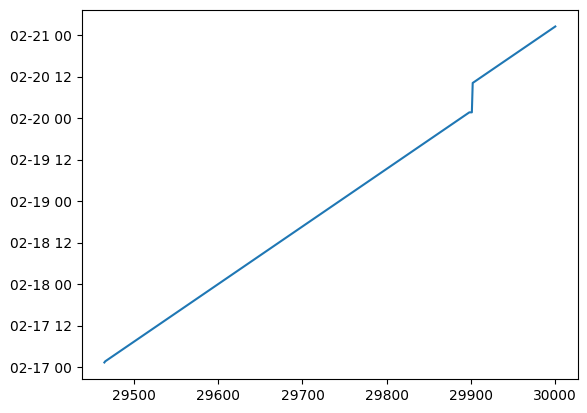

In [31]:
test_df.loc[29465 : 30000]['TIMESTAMP'].plot()

<Axes: >

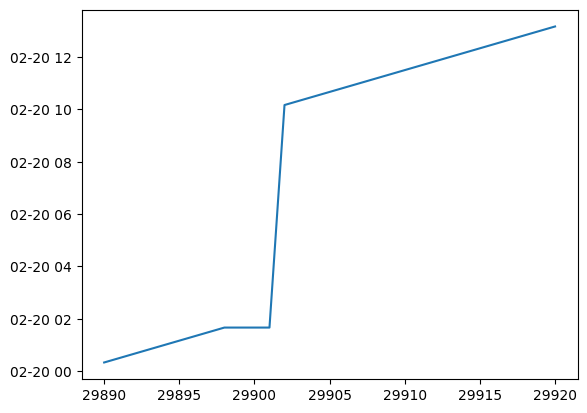

In [45]:
test_df.loc[29890 : 29920]['TIMESTAMP'].plot()

<Axes: >

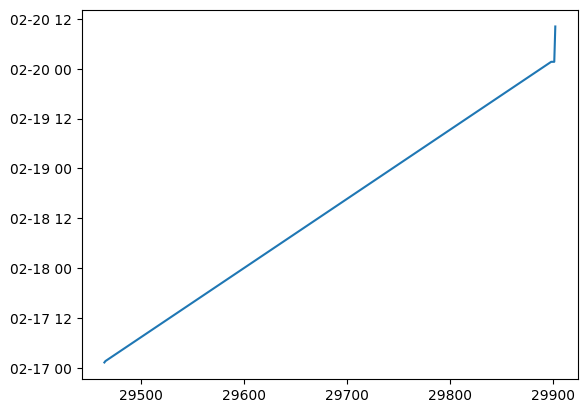

In [33]:
test_df.loc[29465 : 29902]['TIMESTAMP'].plot()

In [219]:
df['BUILDING'].drop_duplicates()

0           561
4133481     562
12036750    563
Name: BUILDING, dtype: int64

In [220]:
buildings = df['BUILDING'].drop_duplicates().values
buildings

array([561, 562, 563], dtype=int64)

In [222]:
df.iloc[19969705]

BUILDING                          563
FLOOR                              23
TIMESTAMP         2023-08-30 10:30:00
CONSUMPTION(W)                    319
Name: 19969705, dtype: object

In [296]:
floor_df = df.query(f"`BUILDING` == 561 and `FLOOR` == 2").reset_index(drop = True)

begin_idx = floor_df.query("`TIMESTAMP` == @START_TIME").iloc[0].name
last_idx = floor_df.query("`TIMESTAMP` == @END_TIME").iloc[0].name

floor_df.loc[begin_idx]

BUILDING                          561
FLOOR                               2
TIMESTAMP         2023-03-16 06:30:00
CONSUMPTION(W)                    256
Name: 33343, dtype: object

In [297]:
floor_df.loc[last_idx]

BUILDING                          561
FLOOR                               2
TIMESTAMP         2023-08-30 10:30:00
CONSUMPTION(W)                    865
Name: 57415, dtype: object

In [346]:
final_df = pd.DataFrame({'BUILDING':[],	'FLOOR':[],	'TIMESTAMP':[],	'CONSUMPTION(W)':[]})

buildings = df['BUILDING'].drop_duplicates().sort_values().values
for b in buildings:
    floors = df.query(f"`BUILDING` == {b}")['FLOOR'].drop_duplicates().sort_values().values
    for f in floors:
        floor_df = df.query(f"`BUILDING` == {b} and `FLOOR` == {f}").reset_index(drop = True)

        begin_idx = floor_df.query("`TIMESTAMP` == @START_TIME").iloc[0].name
        last_idx = floor_df.query("`TIMESTAMP` == @END_TIME").iloc[0].name
        
        floor_df = floor_df.iloc[begin_idx:last_idx + 1].reset_index(drop = True)

        #시간 단위 정리
        for i, row in floor_df.iterrows():
            floor_df.at[i,'TIMESTAMP'] = row['TIMESTAMP'].replace(second = 0, minute = row['TIMESTAMP'].minute//10 * 10)
        
        #이상치 제거
        q1=floor_df['CONSUMPTION(W)'].quantile(0.25)
        q3=floor_df['CONSUMPTION(W)'].quantile(0.75)
        iqr=q3-q1
        
        boundary=1.5*iqr
        
        index1=floor_df[floor_df['CONSUMPTION(W)'] > q3+boundary].index
        index2=floor_df[floor_df['CONSUMPTION(W)'] < q1-boundary].index 

        floor_df.loc[index1, 'CONSUMPTION(W)'] = np.nan
        floor_df.loc[index2, 'CONSUMPTION(W)'] = np.nan

        #중복 시간대 제거
        floor_df.drop_duplicates(subset=['TIMESTAMP'], inplace=True)

        #결측치 찾기
        missing_times = []
        time = floor_df.iloc[0]['TIMESTAMP']
        i = 0
        while time <= END_TIME:
            if floor_df.iloc[i]['TIMESTAMP'] != time:
                i -= 1
                missing_times.append(time)
                append_df = pd.DataFrame({'BUILDING' : [b], 'FLOOR' : [f], 'TIMESTAMP' : [time], 'CONSUMPTION(W)' : [np.nan]})
                floor_df = pd.concat([floor_df,append_df], ignore_index = True)

            i += 1
            time += datetime.timedelta(minutes = 10)

        floor_df.reset_index(drop=True, inplace=True)
        floor_df.sort_values(by='TIMESTAMP', ascending=True, inplace=True)

        print(f'{f}호 결측치 갯수: {len(missing_times)}')
        
        #선형 보간하기

        print(f"보간 전 {b}동 {f}호 : " , floor_df.isna().sum())

        floor_df['CONSUMPTION(W)'].interpolate(method = "linear", inplace = True)

        print(f"보간 후 {b}동 {f}호 : " , floor_df.isna().sum())

        #최종 데이터프레임에 병합하기
        final_df = pd.concat([final_df, floor_df], ignore_index = True)

        print(f"{b} 동 {f} 호 완료")

final_df = final_df[['TIMESTAMP', 'BUILDING', 'FLOOR', 'CONSUMPTION(W)']]

final_df['BUILDING'] = final_df['BUILDING'].astype(int)
final_df['FLOOR'] = final_df['FLOOR'].astype(int)
final_df['CONSUMPTION(W)'] = final_df['CONSUMPTION(W)'].astype(int)


1호 결측치 갯수: 0
보간 전 561동 1호 :  BUILDING             0
FLOOR                0
TIMESTAMP            0
CONSUMPTION(W)    2059
dtype: int64
보간 후 561동 1호 :  BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dtype: int64
561 동 1 호 완료


C:\Users\hansung\AppData\Local\Temp\ipykernel_35644\68871875.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, floor_df], ignore_index = True)


2호 결측치 갯수: 1
보간 전 561동 2호 :  BUILDING             0
FLOOR                0
TIMESTAMP            0
CONSUMPTION(W)    1663
dtype: int64
보간 후 561동 2호 :  BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dtype: int64
561 동 2 호 완료
3호 결측치 갯수: 1
보간 전 561동 3호 :  BUILDING             0
FLOOR                0
TIMESTAMP            0
CONSUMPTION(W)    1448
dtype: int64
보간 후 561동 3호 :  BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dtype: int64
561 동 3 호 완료
4호 결측치 갯수: 1
보간 전 561동 4호 :  BUILDING             0
FLOOR                0
TIMESTAMP            0
CONSUMPTION(W)    1643
dtype: int64
보간 후 561동 4호 :  BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dtype: int64
561 동 4 호 완료
5호 결측치 갯수: 0
보간 전 561동 5호 :  BUILDING             0
FLOOR                0
TIMESTAMP            0
CONSUMPTION(W)    1576
dtype: int64
보간 후 561동 5호 :  BUILDING          0
FLOOR             0
TIMESTAMP         0
CONSUMPTION(W)    0
dt

In [347]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1588818 entries, 0 to 1588817
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   TIMESTAMP       1588818 non-null  datetime64[ns]
 1   BUILDING        1588818 non-null  int32         
 2   FLOOR           1588818 non-null  int32         
 3   CONSUMPTION(W)  1588818 non-null  int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 30.3 MB


In [348]:
final_df


,TIMESTAMP,BUILDING,FLOOR,CONSUMPTION(W)
0,2023-03-16 06:30:00,561,1,225
1,2023-03-16 06:40:00,561,1,217
2,2023-03-16 06:50:00,561,1,212
3,2023-03-16 07:00:00,561,1,88
4,2023-03-16 07:10:00,561,1,435
...,...,...,...,...
1588813,2023-08-30 09:50:00,563,24,366
1588814,2023-08-30 10:00:00,563,24,545
1588815,2023-08-30 10:10:00,563,24,567
1588816,2023-08-30 10:20:00,563,24,547


In [351]:
final_df.to_csv("..\preprocessed_data\[10분 단위]아파트_층별_소비전력_2023-03-16 06.30.00 ~ 2023-08-30 10.30.00.csv")